In [10]:
import pickle
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# let's unpickle the two files

# award df
with open('just_metascore.pk1', 'r') as picklefile:
    metascore_df = pickle.load(picklefile)

# gross box office df
with open('clean_mojo_df.pk1', 'r') as picklefile:
    mojo_df = pickle.load(picklefile)

In [15]:
print len(metascore_df)
print len(mojo_df)
print mojo_df.head()
print metascore_df.head()

1831
1831
  rank                           title studio      gross theatres_life  \
1    1  Crouching Tiger, Hidden Dragon    SPC  128078872         2,027   
2    2               Life Is Beautiful  Mira.   57563264         1,136   
3    3                            Hero  Mira.   53710019         2,175   
4    4       Instructions Not Included    LGF   44467206           978   
5    5                 Pan's Labyrinth   PicH   37634615         1,143   

    opening theaters_opening                 date  
1    663205               16  2000-12-08 00:00:00  
2    118920                6  1998-10-23 00:00:00  
3  18004319            2,031  2004-08-27 00:00:00  
4   7846426              348  2013-08-30 00:00:00  
5    568641               17  2006-12-29 00:00:00  
0    93
1    59
2    84
3    55
4    98
Name: Metascore, dtype: object


I don't know why the index is starting again at 1 for the mojo df but I should reset it

In [16]:
mojo_df.reset_index(inplace=True)
print mojo_df.head()

   index rank                           title studio      gross theatres_life  \
0      1    1  Crouching Tiger, Hidden Dragon    SPC  128078872         2,027   
1      2    2               Life Is Beautiful  Mira.   57563264         1,136   
2      3    3                            Hero  Mira.   53710019         2,175   
3      4    4       Instructions Not Included    LGF   44467206           978   
4      5    5                 Pan's Labyrinth   PicH   37634615         1,143   

    opening theaters_opening                 date  
0    663205               16  2000-12-08 00:00:00  
1    118920                6  1998-10-23 00:00:00  
2  18004319            2,031  2004-08-27 00:00:00  
3   7846426              348  2013-08-30 00:00:00  
4    568641               17  2006-12-29 00:00:00  


In [17]:
df = pd.concat([mojo_df, metascore_df], axis=1)

In [18]:
# let's get rid of the non-metascores

print len(df)
df_clean_meta = df[pd.notnull(df['Metascore'])]
print len(df_clean_meta)
df_clean_meta = df_clean_meta[df['Metascore'] != 'N/A']
print len(df_clean_meta)
print df.ix[0]

1831
1679
1012
index                                            1
rank                                             1
title               Crouching Tiger, Hidden Dragon
studio                                         SPC
gross                                    128078872
theatres_life                                2,027
opening                                     663205
theaters_opening                                16
date                           2000-12-08 00:00:00
Metascore                                       93
Name: 0, dtype: object


In [22]:
print len(df_clean_meta)
df_clean = df_clean_meta[pd.notnull(df_clean_meta['gross'])]
print len(df_clean)

1012
988


In [24]:
df_clean['Metascore'] = df_clean['Metascore'].astype(int)
df_clean['gross'] = df_clean['gross'].astype(int)

/Users/johnkeating/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/johnkeating/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


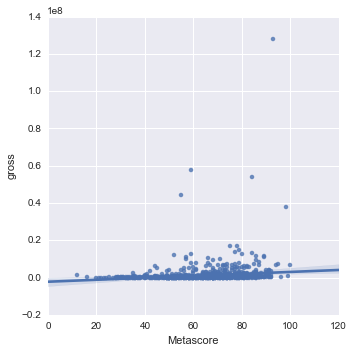

In [26]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x="Metascore", y="gross", data=df_clean)

In [30]:
import statsmodels.api as sm
from patsy import dmatrices
from patsy import dmatrix

y, X = dmatrices('gross ~ Metascore', data=df_clean, return_type='dataframe')

In [31]:
model = sm.OLS(y, X)
results = model.fit()

In [32]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     18.53
Date:                Wed, 07 Oct 2015   Prob (F-statistic):           1.84e-05
Time:                        15:13:42   Log-Likelihood:                -16720.
No. Observations:                 988   AIC:                         3.344e+04
Df Residuals:                     986   BIC:                         3.345e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -2.254e+06   8.22e+05     -2.742      0.006     -3.87e+06 -6.41e+05
Metascore   5.255e+04   1.22e+04      4.304      0.000      2.86e+04  7.65e+04
==============================================================================
Omnibus:                     2005.338   Durbin-Watson:                   0.215
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4161394.290
Skew:                          15.625   Prob(JB):                         0.00
Kurtosis:                     319.402   Cond. No.                         321.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""